In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
import requests
url = 'https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv'
res = requests.get(url, allow_redirects=True)
with open('spam_data.tsv','wb') as file:
    file.write(res.content)
data = pd.read_csv('spam_data.tsv',sep='\t')

In [18]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


***Checking to see if there are any null values in the data set. By doing this we can know if and how to clean it***

In [19]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

***Checking to see the data distribution by categories for the label column. We do this to know the different categories that make up a particular column and also how many of each category exists in the data set***


In [20]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

We have a unbalanced data distribution.<br>
ham: 4825 <br>
spam: 747

In order to balance this, we have to obtain 747 data points from the ham category so that it matches the number of available data points that the spam category has.

In [21]:
ham = data[data['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [22]:
spam = data[data['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [23]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [24]:
ham = ham.sample(spam.shape[0])

In [25]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [26]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### **Exploratory Data Analysis**

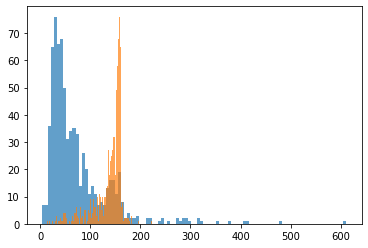

In [27]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)

plt.show()

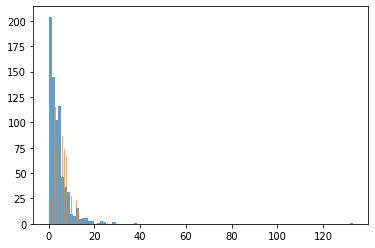

In [28]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)

plt.show()

### **Data Preparation** 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size=0.3, random_state=0, shuffle=True, stratify=data['label'])

In [43]:
y_train.value_counts()

spam    523
ham     522
Name: label, dtype: int64

### **Word Embedding** with Pipeline. Here we use the Pipeline module to schedule the word embedding mechanism along with algorithm we're using to model the data

`RandomForestClassifier` 

In [55]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('rf',RandomForestClassifier(n_estimators=100,n_jobs=1))])

In [56]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [57]:
y_pred = clf.predict(X_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[223,   2],
       [ 28, 196]])

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



In [61]:
accuracy_score(y_test,y_pred)

0.933184855233853

Let's test this out with a random message

In [67]:
clf.predict(["Hi, This is Felix"])

array(['ham'], dtype=object)

In [68]:
clf.predict(["You have just won 1 million euros, click the link to claim"])

array(['spam'], dtype=object)

`MLPClassifier` 

In [100]:
clf_1 = Pipeline([('tfidf',TfidfVectorizer()),('rf',MLPClassifier(max_iter=100,alpha=0.1))])

In [101]:
clf_1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                               beta_1=0.9, beta_2=0.999, early_stopping=False,
                               epsilon=1e-08, hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                     

In [102]:
y_pred = clf_1.predict(X_test)

In [103]:
confusion_matrix(y_test,y_pred)

array([[222,   3],
       [ 17, 207]])

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       225
        spam       0.99      0.92      0.95       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [105]:
accuracy_score(y_test,y_pred)

0.955456570155902

Let's test this out with a random message

In [75]:
clf_1.predict(["Hi, This is Felix"])

array(['ham'], dtype='<U4')

In [76]:
clf_1.predict(["You have just won 1 million euros, click the link to claim"])

array(['spam'], dtype='<U4')

`SVC (Support Vector Classifier)` 

In [82]:
clf_2 = Pipeline([('tfidf',TfidfVectorizer()),('rf',SVC(C=1000,gamma='auto'))])

In [83]:
clf_2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('rf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_func

In [84]:
y_pred = clf_2.predict(X_test)

In [85]:
confusion_matrix(y_test,y_pred)

array([[223,   2],
       [ 17, 207]])

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       225
        spam       0.99      0.92      0.96       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [87]:
accuracy_score(y_test,y_pred)

0.9576837416481069

Let's test this out with a random message

In [106]:
clf_2.predict(["Hi, This is Felix"])

array(['ham'], dtype=object)

In [107]:
clf_2.predict(["You have just won 1 million euros, click the link to claim"])

array(['spam'], dtype=object)